<a href="https://colab.research.google.com/github/Ybyang2011/HW2-solution/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CSCI 5662 Homework 2 Spring 2024
Boyang Yu

#### Install useful package in Google Colab

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install statistics
!pip install seaborn
!pip install fitter
!pip install scipy
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
from fitter import Fitter
#Need this
from sklearn.preprocessing import StandardScaler
import scipy.stats

In [253]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [254]:
#df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hw2.csv', encoding = 'utf-8')
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hw2.csv', encoding='ISO-8859-1')
# df.isna().sum()#No missing value
# df.columns = df.columns.str.strip()
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hw-2.csv')
df.head(20)

,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxymol,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,NH3uM,C14As1,C14As2,DarkAs,LightP,Year
0,0,33.418,NaN,24.287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
1,10,33.419,NaN,24.302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
2,20,33.420,NaN,24.318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
3,30,33.400,NaN,24.410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
4,40,33.380,NaN,24.470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
5,50,33.360,NaN,24.503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
6,75,33.334,NaN,24.684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
7,100,33.470,NaN,25.103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
8,125,33.540,NaN,25.613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
9,150,33.582,NaN,25.843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980


In [255]:
df.isna().sum()

Depthm         0
Salnty      3270
O2ml_L     26357
STheta      5510
O2Sat      26964
Oxymol     26970
ChlorA    116829
Phaeop    116832
PO4uM      35625
SiO3uM     34752
NO2uM      37090
NH3uM     260319
C14As1    310849
C14As2    310867
DarkAs    302632
LightP    306630
Year           0
dtype: int64

# ****Question 1 Data Exploration:****

In Question 1, I will utilize the pandas.DataFrame.corr() syntax. This syntax automatically excludes any NaN values, therefore, I don't need to remove the missing data manually. To confirm this approach, I have calculated the correlation between 'Depthm' and 'Salnty' using both methods. The results from both methods are identical.

In [256]:
#Directly using pandas.DataFrame.corr() syntax:
corr_Depthm_Salnty = df['Depthm'].corr(df['Salnty'])
print("Pearson's correlation coefficient between Cast Depth and Salinity:", corr_Depthm_Salnty)
#Removing the the missing values manually:
cleaned_df = df.dropna(subset=['Depthm', 'Salnty'])
cleaned_df
correlation=scipy.stats.pearsonr(cleaned_df['Depthm'],cleaned_df['Salnty'])[0]
print("If first removing the missing values manually, Pearson's correlation coefficient between Cast Depth and Salinity:", correlation)

Pearson's correlation coefficient between Cast Depth and Salinity: 0.7150357558237956
If first removing the missing values manually, Pearson's correlation coefficient between Cast Depth and Salinity: 0.7150357558237956


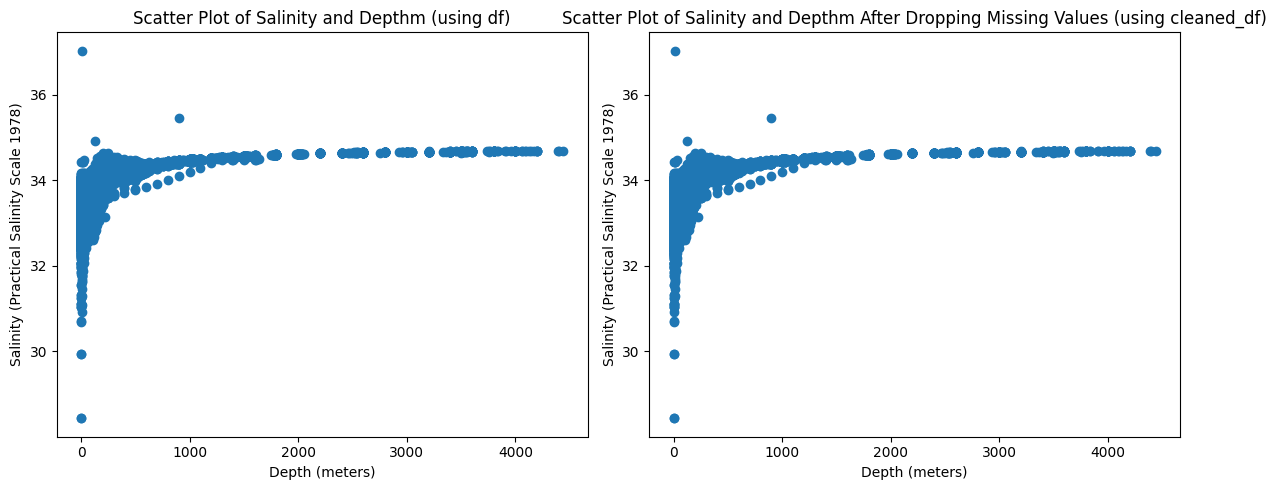

In [257]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))  # figsize can be adjusted based on your needs

# First plot (Original Data)
ax[0].scatter(df['Depthm'], df['Salnty'])
ax[0].set_title('Scatter Plot of Salinity and Depthm (using df)')
ax[0].set_xlabel('Depth (meters)')
ax[0].set_ylabel('Salinity (Practical Salinity Scale 1978)')

# Second plot (Cleaned Data)
ax[1].scatter(cleaned_df['Depthm'], cleaned_df['Salnty'])
ax[1].set_title('Scatter Plot of Salinity and Depthm After Dropping Missing Values (using cleaned_df)')
ax[1].set_xlabel('Depth (meters)')
ax[1].set_ylabel('Salinity (Practical Salinity Scale 1978)')

# Display the plots side by side
plt.tight_layout()
plt.show()


Everything appears identical. As a result, I don't need to manually remove missing values at the beginning.

In [258]:
corr_O2ml_L_Salnty = df['O2ml_L'].corr(df['Salnty'])
print("Pearson's correlation coefficient between O2ml_L and Salinity:", corr_O2ml_L_Salnty)


Pearson's correlation coefficient between O2ml_L and Salinity: -0.9137646831628807


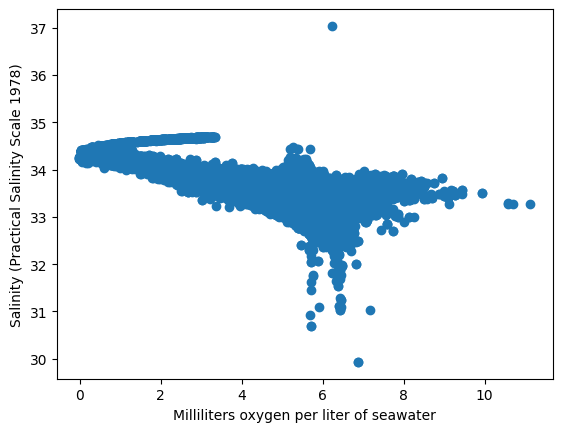

In [259]:
plt.scatter(df['O2ml_L'], df['Salnty'])
plt.ylabel('Salinity (Practical Salinity Scale 1978)')
plt.xlabel('Milliliters oxygen per liter of seawater')
plt.show()

In [260]:
corr_STheta_Salnty = df['STheta'].corr(df['Salnty'])
print("Pearson's correlation coefficient between Sigma Theta and Salinity:", corr_STheta_Salnty)

Pearson's correlation coefficient between Sigma Theta and Salinity: 0.6136725558411861


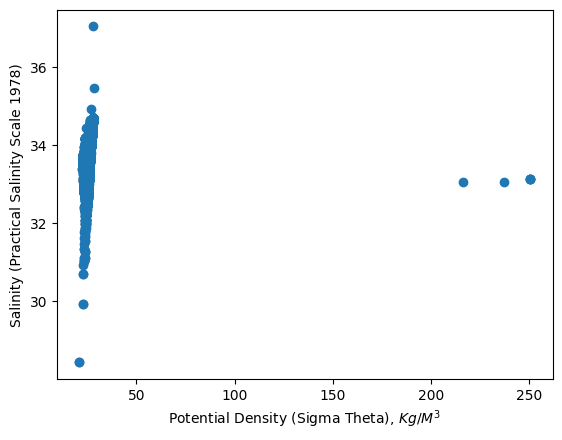

In [261]:
plt.scatter(df['STheta'], df['Salnty'])
plt.ylabel('Salinity (Practical Salinity Scale 1978)')
plt.xlabel('Potential Density (Sigma Theta), $Kg/M^3$')
plt.show()

In [262]:
corr_O2Sat_Salnty = df['O2Sat'].corr(df['Salnty'])
print("Pearson's correlation coefficient between Oxygen percent saturation and Salinity:", corr_O2Sat_Salnty)

Pearson's correlation coefficient between Oxygen percent saturation and Salinity: -0.9034429826803287


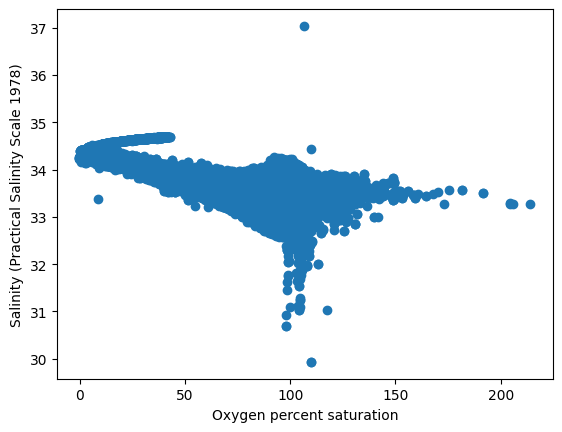

In [263]:
plt.scatter(df['O2Sat'], df['Salnty'])
plt.ylabel('Salinity (Practical Salinity Scale 1978)')
plt.xlabel('Oxygen percent saturation')
plt.show()

In [99]:
corr_ChlorA_Salnty = df['ChlorA'].corr(df['Salnty'])
print("Pearson's correlation coefficient between Migrograms Chlorophyll-a per liter seawater (measured fluorometrically) and Salinity:\n", corr_ChlorA_Salnty)


Pearson's correlation coefficient between Migrograms Chlorophyll-a per liter seawater (measured fluorometrically) and Salinity:
 -0.0671334492759384


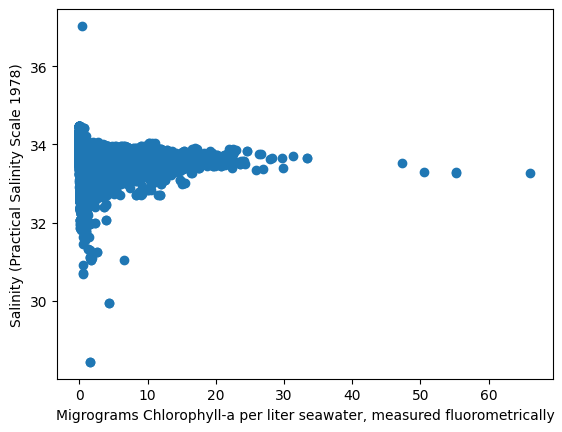

In [58]:
plt.scatter(df['ChlorA'], df['Salnty'])
plt.ylabel('Salinity (Practical Salinity Scale 1978)')
plt.xlabel('Migrograms Chlorophyll-a per liter seawater, measured fluorometrically')
plt.show()

In [59]:
corr_Oxy_µmol_Kg_Salnty = df['Oxymol'].corr(df['Salnty'])
print("Pearson's correlation coefficient between Oxygen micromoles per kilogram seawater and Salinity:", corr_Oxy_µmol_Kg_Salnty)

Pearson's correlation coefficient between Oxygen micromoles per kilogram seawater and Salinity: -0.9140322469454206


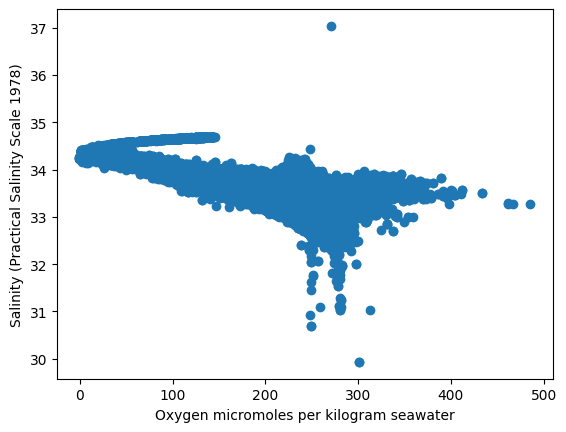

In [66]:
plt.scatter(df['Oxymol'], df['Salnty'])
plt.ylabel('Salinity (Practical Salinity Scale 1978)')
plt.xlabel('Oxygen micromoles per kilogram seawater')
plt.show()

In [98]:
corr_Phaeop_Salnty = df['Phaeop'].corr(df['Salnty'])
print("Pearson's correlation coefficient between Micrograms Phaeopigment per liter seawater (measured fluorometrically) and Salinity:\n", corr_Phaeop_Salnty)

Pearson's correlation coefficient between Micrograms Phaeopigment per liter seawater (measured fluorometrically) and Salinity:
 -0.04622498395675865


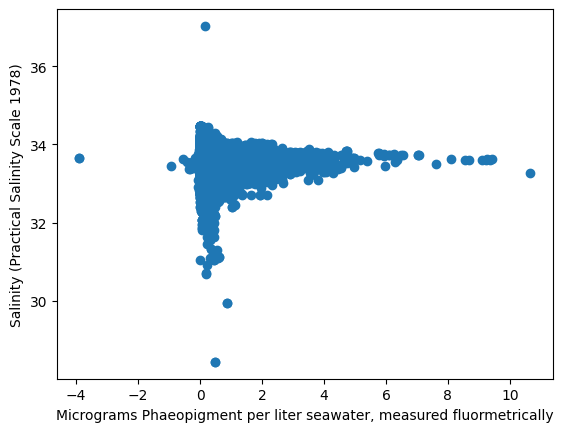

In [68]:
plt.scatter(df['Phaeop'], df['Salnty'])
plt.ylabel('Salinity (Practical Salinity Scale 1978)')
plt.xlabel('Micrograms Phaeopigment per liter seawater, measured fluormetrically')
plt.show()

In [69]:
corr_PO4uM_Salnty = df['PO4uM'].corr(df['Salnty'])
print("Pearson's correlation coefficient between Micrograms Micromoles Phosphate per liter of seawater and Salinity:", corr_PO4uM_Salnty)

Pearson's correlation coefficient between Micrograms Micromoles Phosphate per liter of seawater and Salinity: 0.8975988894063016


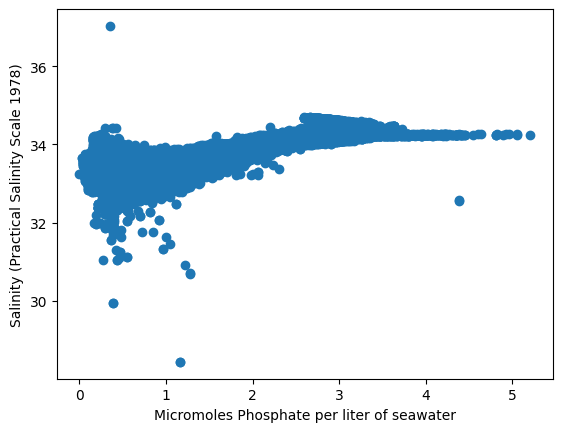

In [70]:
plt.scatter(df['PO4uM'], df['Salnty'])
plt.ylabel('Salinity (Practical Salinity Scale 1978)')
plt.xlabel('Micromoles Phosphate per liter of seawater')
plt.show()

In [71]:
corr_SiO3uM_Salnty = df['SiO3uM'].corr(df['Salnty'])
print("Pearson's correlation coefficient between Micromoles Silicate per liter of seawater and Salinity:", corr_SiO3uM_Salnty)

Pearson's correlation coefficient between Micromoles Silicate per liter of seawater and Salinity: 0.865414873223474


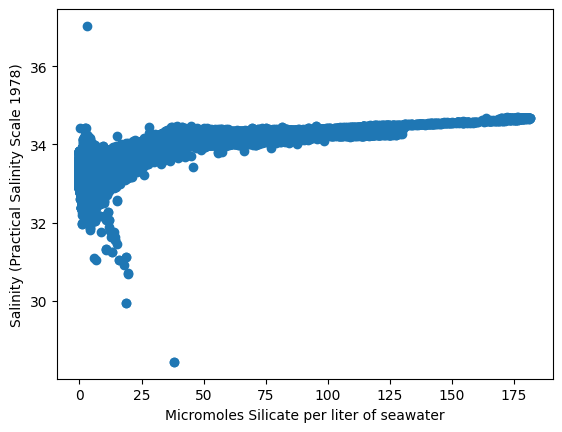

In [72]:
plt.scatter(df['SiO3uM'], df['Salnty'])
plt.ylabel('Salinity (Practical Salinity Scale 1978)')
plt.xlabel('Micromoles Silicate per liter of seawater')
plt.show()

In [73]:
corr_NO2uM_Salnty = df['NO2uM'].corr(df['Salnty'])
print("Pearson's correlation coefficient between Micromoles Nitrite per liter of seawater and Salinity:", corr_NO2uM_Salnty)

Pearson's correlation coefficient between Micromoles Nitrite per liter of seawater and Salinity: -0.1956633666215827


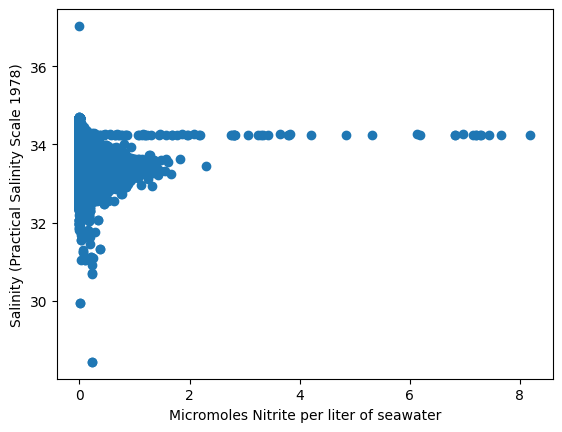

In [74]:
plt.scatter(df['NO2uM'], df['Salnty'])
plt.ylabel('Salinity (Practical Salinity Scale 1978)')
plt.xlabel('Micromoles Nitrite per liter of seawater')
plt.show()

In [75]:
corr_NH3uM_Salnty = df['NH3uM'].corr(df['Salnty'])
print("Pearson's correlation coefficient between Micromoles Ammonia per liter of seawater and Salinity:", corr_NH3uM_Salnty)

Pearson's correlation coefficient between Micromoles Ammonia per liter of seawater and Salinity: -0.11874699174255673


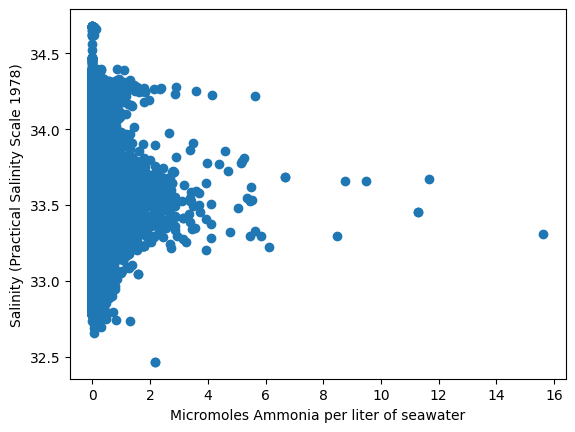

In [76]:
plt.scatter(df['NH3uM'], df['Salnty'])
plt.ylabel('Salinity (Practical Salinity Scale 1978)')
plt.xlabel('Micromoles Ammonia per liter of seawater')
plt.show()

In [96]:
corr_C14As1_Salnty = df['C14As1'].corr(df['Salnty'])
print("Pearson's correlation coefficient between 14C Assimilation of Replicate 1 (milligrams carbon per cubic meter of seawater per half \nlight day) and Salinity:", corr_C14As1_Salnty)

Pearson's correlation coefficient between 14C Assimilation of Replicate 1 (milligrams carbon per cubic meter of seawater per half 
light day) and Salinity: 0.19751420081486573


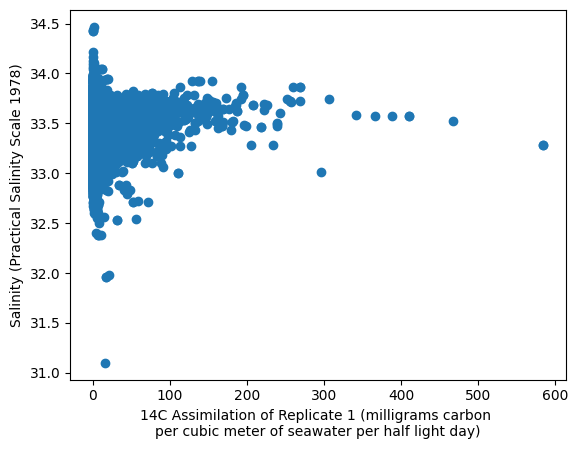

In [80]:
plt.scatter(df['C14As1'], df['Salnty'])
plt.ylabel('Salinity (Practical Salinity Scale 1978)')
plt.xlabel('14C Assimilation of Replicate 1 (milligrams carbon \nper cubic meter of seawater per half light day)')
plt.show()

In [94]:
corr_C14As2_Salnty = df['C14As2'].corr(df['Salnty'])
print("Pearson's correlation coefficient between 14C Assimilation of Replicate 2 (milligrams carbon per cubic meter of seawater per half light day) \nand Salinity:", corr_C14As2_Salnty)

Pearson's correlation coefficient between 14C Assimilation of Replicate 2 (milligrams carbon per cubic meter of seawater per half light day) 
and Salinity: 0.18596024631362953


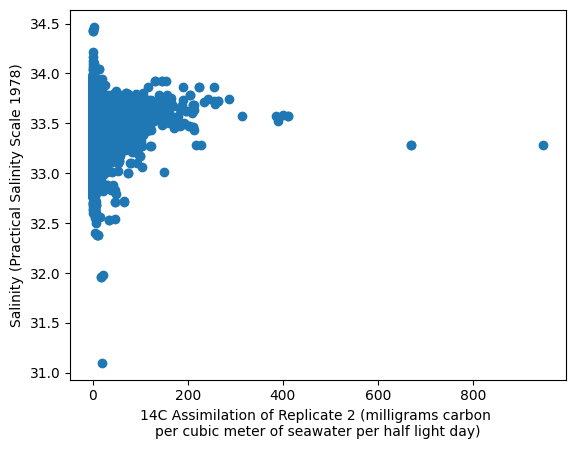

In [82]:
plt.scatter(df['C14As2'], df['Salnty'])
plt.ylabel('Salinity (Practical Salinity Scale 1978)')
plt.xlabel('14C Assimilation of Replicate 2 (milligrams carbon \nper cubic meter of seawater per half light day)')
plt.show()

In [95]:
corr_DarkAs_Salnty = df['DarkAs'].corr(df['Salnty'])
print("Pearson's correlation coefficient between 14C Assimilation of Dark/Control Bottle (milligrams carbon per cubic meter of seawater per half \nlight day) and Salinity:", corr_DarkAs_Salnty)

Pearson's correlation coefficient between 14C Assimilation of Dark/Control Bottle (milligrams carbon per cubic meter of seawater per half 
light day) and Salinity: 0.1413377429200496


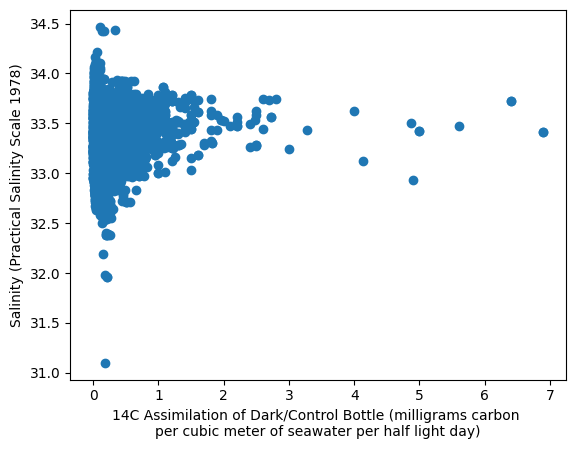

In [84]:
plt.scatter(df['DarkAs'], df['Salnty'])
plt.ylabel('Salinity (Practical Salinity Scale 1978)')
plt.xlabel('14C Assimilation of Dark/Control Bottle (milligrams carbon \nper cubic meter of seawater per half light day)')
plt.show()

In [91]:
corr_LightP_Salnty = df['LightP'].corr(df['Salnty'])
print("Pearson's correlation coefficient between percentage of Light intensities of the incubation tubes in the primary productivity experiment \n and Salinity:", corr_LightP_Salnty)

Pearson's correlation coefficient between percentage of Light intensities of the incubation tubes in the primary productivity experiment 
 and Salinity: -0.02892579963702111


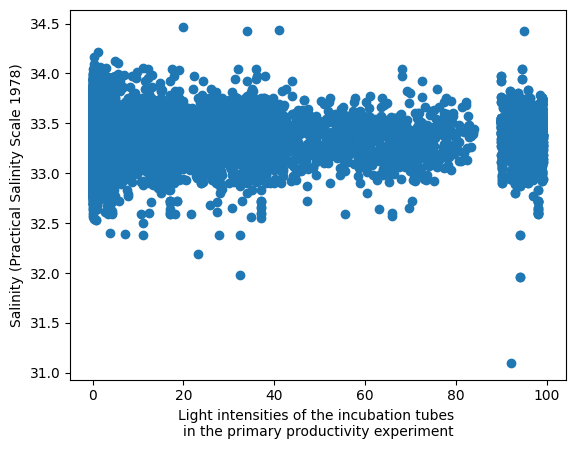

In [86]:
plt.scatter(df['LightP'], df['Salnty'])
plt.ylabel('Salinity (Practical Salinity Scale 1978)')
plt.xlabel('Light intensities of the incubation tubes \nin the primary productivity experiment')
plt.show()

In [87]:
corr_Year_Salnty = df['Year'].corr(df['Salnty'])
print("Pearson's correlation coefficient between Year and Salinity:", corr_Year_Salnty)

Pearson's correlation coefficient between Year and Salinity: -0.028696586773831353


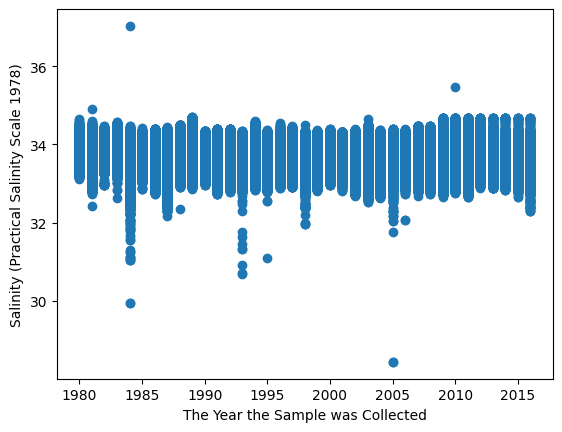

In [89]:
plt.scatter(df['Year'], df['Salnty'])
plt.ylabel('Salinity (Practical Salinity Scale 1978)')
plt.xlabel('The Year the Sample was Collected')
plt.show()


Based on the Pearson correlations mentioned above, 'Oxymol'—which represents oxygen micromoles per kilogram of seawater—is the most predictive variable for Salinity levels due to it having the highest Pearson correlation coefficient in absolute terms. The correlation between 'Oxymol' and 'Salnty' is -0.9140322469454206, indicating a relationship that is close to a perfect negative linear correlation.


# ****Question 2 Data Exploration: Pearson's Correlation Matrix and Heatmap****


In [264]:
df_16features = df.drop(columns='Salnty')


In [265]:
df_16features.corr()

,Depthm,O2ml_L,STheta,O2Sat,Oxymol,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,NH3uM,C14As1,C14As2,DarkAs,LightP,Year
Depthm,1.000000,-0.750968,0.521110,-0.746203,-0.751041,-0.282742,-0.240075,0.796075,0.913041,-0.191154,-0.164553,-0.263494,-0.252364,-0.246394,-0.472293,0.000432
O2ml_L,-0.750968,1.000000,-0.917149,0.994579,0.999999,0.281132,0.190070,-0.983838,-0.936703,0.204124,0.169580,0.302724,0.310116,0.230951,0.155446,-0.061351
STheta,0.521110,-0.917149,1.000000,-0.830720,-0.917604,-0.085328,0.012970,0.957313,0.881600,-0.114449,-0.126166,0.067714,0.055207,-0.024224,-0.337227,0.002843
O2Sat,-0.746203,0.994579,-0.830720,1.000000,0.994698,0.254934,0.151206,-0.991510,-0.927659,0.182434,0.164396,0.257380,0.269431,0.223871,0.255380,-0.057421
Oxymol,-0.751041,0.999999,-0.917604,0.994698,1.000000,0.280787,0.189615,-0.983984,-0.936599,0.204265,0.169480,0.302736,0.310128,0.230923,0.156742,-0.060294
ChlorA,-0.282742,0.281132,-0.085328,0.254934,0.280787,1.000000,0.693789,-0.184753,-0.184798,0.200306,0.182332,0.753438,0.772853,0.423677,-0.031144,0.039411
Phaeop,-0.240075,0.190070,0.012970,0.151206,0.189615,0.693789,1.000000,-0.089680,-0.125255,0.383376,0.292721,0.494476,0.487695,0.305949,-0.133467,0.016457
PO4uM,0.796075,-0.983838,0.957313,-0.991510,-0.983984,-0.184753,-0.089680,1.000000,0.945701,-0.154264,-0.142258,-0.037577,-0.039164,-0.072913,-0.254923,0.046447
SiO3uM,0.913041,-0.936703,0.881600,-0.927659,-0.936599,-0.184798,-0.125255,0.945701,1.000000,-0.182142,-0.157375,0.006651,0.004061,-0.045391,-0.205175,0.009348
NO2uM,-0.191154,0.204124,-0.114449,0.182434,0.204265,0.200306,0.383376,-0.154264,-0.182142,1.000000,0.273526,0.076063,0.072195,0.040838,-0.216017,0.042748


In [266]:
corr_matrix = df_16features.corr()
corr_matrix_abs = corr_matrix.abs()
sorted_correlations = (corr_matrix_abs.unstack()).sort_values(kind="quicksort")


largest_correlations = sorted_correlations[-17:-16]
print(largest_correlations)

O2ml_L  Oxymol    0.999999
dtype: float64


"O2ml_L" and "Oxymol" have the highest Pearson's correlation in absolute value. Therefore, 'O2ml_L' and 'Oxymol' are the most correlated with each other.

Text(0.5, 1.0, 'Correlation Heatmap between 16 Features')

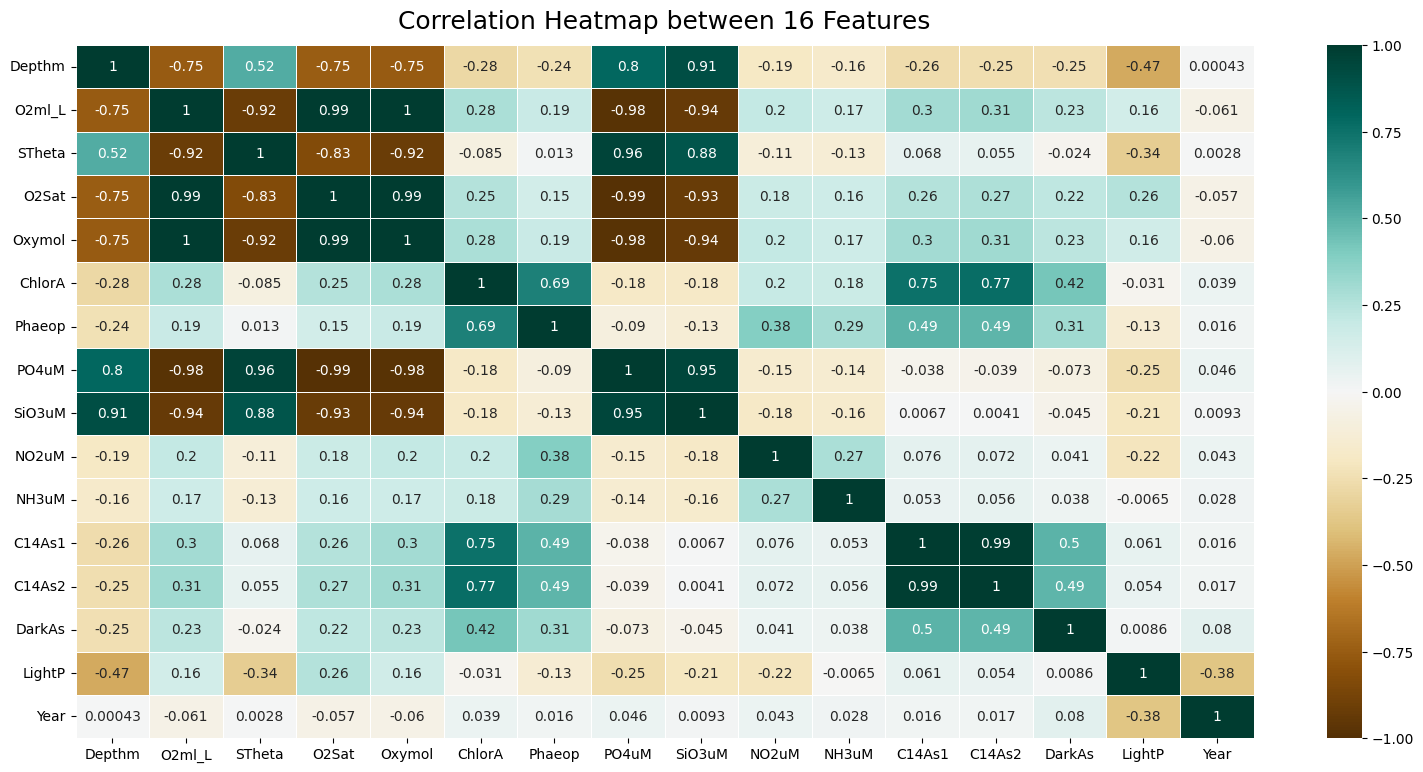

In [267]:
plt.figure(figsize=(19, 9))
heatmap=sns.heatmap(corr_matrix,
            annot=True,    # This will annotate the cells with correlation values
            cmap='BrBG',  # Choose a colormap that represents the data well
            vmin=-1, vmax=1,  # Set the scale of the colormap from 0 to 1
            linewidths=.5,  # Set linewidth between the cells
            )

heatmap.set_title('Correlation Heatmap between 16 Features',fontdict={'fontsize':18},pad=12)



From the heatmap, we observe the same result as mentioned previously: 'O2ml_L' and 'Oxymol' exhibit a correlation nearly perfect at 1 between each other. I say "nearly perfect at 1 " here because the heatmap displays numbers with two decimal places. examining the matrix more closely reveals that the Pearson correlation between 'O2ml_L' and 'Oxymol' is actually 0.999999. Therefore, 'O2ml_L' and 'Oxymol' are the most correlated to each other.





We can also observe that 'O2Sat' and 'PO4uM', 'O2ml_L' and 'O2Sat', as well as 'Oxymol' and 'O2Sat', all exhibit very strong correlations with each other.

# ****Question 3: Data Cleaning****



In [268]:
df.isna().sum()

Depthm         0
Salnty      3270
O2ml_L     26357
STheta      5510
O2Sat      26964
Oxymol     26970
ChlorA    116829
Phaeop    116832
PO4uM      35625
SiO3uM     34752
NO2uM      37090
NH3uM     260319
C14As1    310849
C14As2    310867
DarkAs    302632
LightP    306630
Year           0
dtype: int64

In [269]:
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

Depthm     0.000000
Salnty     1.005285
O2ml_L     8.102840
STheta     1.693920
O2Sat      8.289448
Oxymol     8.291293
ChlorA    35.916331
Phaeop    35.917253
PO4uM     10.952069
SiO3uM    10.683686
NO2uM     11.402449
NH3uM     80.028960
C14As1    95.563221
C14As2    95.568754
DarkAs    93.037097
LightP    94.266188
Year       0.000000
dtype: float64


I will drop features with more than 80% missing values. This is because, in such cases, even if we try to fill in the missing values, the results would be very biased.

In [270]:
 cleandf1= df.drop(columns=['LightP', 'DarkAs','C14As2','C14As1','NH3uM'])
#Q1=cleandf1['Depthm'].quantile(0.25)
#Q3=cleandf1['Depthm'].quantile(0.75)
#IQR=Q3-Q3

#Identify outlinears
#threshold1=1.5
#outliers = cleandf1[(cleandf1['Depthm'] < Q1 - threshold1 * IQR) | (cleandf1['Depthm'] > Q3 + threshold1 * IQR)]
#print(outliers)

I will not substitute the missing values in the 'Salnty' variable, as it represents the outcome, and the column has a very low percentage of missing values. Therefore, I will remove the rows with missing 'Salnty' values.


In [271]:
cleandf1.dropna(subset=['Salnty'], inplace=True)
cleandf1.head(20);


For features with a very low percentage of missing values (lower than 10%), I will substitute the missing values with the mean values of those features.

In [272]:
cleandf1['O2ml_L'] = cleandf1['O2ml_L'].fillna(cleandf1['O2ml_L'].mean())
cleandf1['O2Sat'] = cleandf1['O2Sat'].fillna(cleandf1['O2Sat'].mean())
cleandf1['Oxymol'] = cleandf1['Oxymol'].fillna(cleandf1['Oxymol'].mean())
cleandf1['STheta']= cleandf1['STheta'].fillna(cleandf1['STheta'].mean())


For features with higher than 10% of missing values, I will replace the missing values with random draws from the distribution observed.

In [273]:
non_missing_values = cleandf1['ChlorA'].dropna()
num_missing = cleandf1['ChlorA'].isnull().sum()
random_samples = np.random.choice(non_missing_values, size=num_missing, replace=True)

missing_indices = cleandf1['ChlorA'].isnull()
cleandf1.loc[missing_indices, 'ChlorA'] = random_samples


In [274]:
non_missing_values1 = cleandf1['Phaeop'].dropna()
num_missing1 = cleandf1['Phaeop'].isnull().sum()
random_samples1 = np.random.choice(non_missing_values1, size=num_missing1, replace=True)

missing_indices1 = cleandf1['Phaeop'].isnull()
cleandf1.loc[missing_indices1, 'Phaeop'] = random_samples1


In [275]:
non_missing_values2 = cleandf1['PO4uM'].dropna()
num_missing2 = cleandf1['PO4uM'].isnull().sum()
random_samples2 = np.random.choice(non_missing_values2, size=num_missing2, replace=True)

missing_indices2 = cleandf1['PO4uM'].isnull()
cleandf1.loc[missing_indices2, 'PO4uM'] = random_samples2

In [276]:
non_missing_values3 = cleandf1['SiO3uM'].dropna()
num_missing3 = cleandf1['SiO3uM'].isnull().sum()
random_samples3 = np.random.choice(non_missing_values3, size=num_missing3, replace=True)

missing_indices3 = cleandf1['SiO3uM'].isnull()
cleandf1.loc[missing_indices3, 'SiO3uM'] = random_samples3

In [277]:
non_missing_values4 = cleandf1['NO2uM'].dropna()
num_missing4 = cleandf1['NO2uM'].isnull().sum()
random_samples4 = np.random.choice(non_missing_values4, size=num_missing4, replace=True)

missing_indices4 = cleandf1['NO2uM'].isnull()
cleandf1.loc[missing_indices4, 'NO2uM'] = random_samples4

In [278]:
cleandf1.isnull().sum() / len(cleandf1) * 100

Depthm    0.0
Salnty    0.0
O2ml_L    0.0
STheta    0.0
O2Sat     0.0
Oxymol    0.0
ChlorA    0.0
Phaeop    0.0
PO4uM     0.0
SiO3uM    0.0
NO2uM     0.0
Year      0.0
dtype: float64

Now, I will do the data normalization

In [279]:
summary_incl_non_numeric = cleandf1.describe(include='all')
print(summary_incl_non_numeric)

              Depthm         Salnty         O2ml_L         STheta  \
count  322011.000000  322011.000000  322011.000000  322011.000000   
mean      166.351612      33.702536       3.758076      25.689539   
std       194.485751       0.403450       1.904334       1.337962   
min         0.000000      28.431000      -0.010000      20.934000   
25%        35.000000      33.390000       2.193000      24.862000   
50%       101.000000      33.668000       3.758076      25.792000   
75%       250.000000      34.071000       5.650000      26.542000   
max      4442.000000      37.034000      11.130000     250.784000   

               O2Sat         Oxymol         ChlorA         Phaeop  \
count  322011.000000  322011.000000  322011.000000  322011.000000   
mean       62.635062     163.631172       0.439566       0.191233   
std        34.354127      82.983707       1.177899       0.282092   
min        -0.100000      -0.434900      -0.001000      -3.890000   
25%        33.300000      95.6516

From the table above, we can see that some variables, such as 'Depthm', 'O2Sat', 'Oxymol', 'STheta', and 'SiO3uM', have higher ranges and means compared to other variables. Therefore, I need to normalize the data using StandardScaler().

In [ ]:
####################################Keep

In [280]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [281]:
NormX_cleandf1=cleandf1.drop(columns=["Salnty"])
Y_cleandf1=cleandf1[["Salnty","Year"]]


In [282]:
Xnormed_train = NormX_cleandf1[(NormX_cleandf1['Year'] >= 1980) & (NormX_cleandf1['Year'] <= 2010)]
Xnormed_train=Xnormed_train.iloc[:,:-1] # All rows, all columns except "year"

scaler=StandardScaler()

X_trainnorm=scaler.fit_transform(Xnormed_train)
X_trainnorm_df = pd.DataFrame(X_trainnorm, columns=Xnormed_train.columns)


In [283]:
y_train= Y_cleandf1[(Y_cleandf1['Year']>=1980)&(Y_cleandf1['Year']<=2010)]
y_train=y_train.drop(columns=['Year'])

In [284]:
Xnormed_dev = NormX_cleandf1[(NormX_cleandf1['Year'] >= 2011) & (NormX_cleandf1['Year'] <= 2013)]
Xnormed_dev=Xnormed_dev.iloc[:,:-1] # All rows, all columns except "year"

scaler=StandardScaler()

X_devnorm=scaler.fit_transform(Xnormed_dev)
X_devnorm_df = pd.DataFrame(X_devnorm, columns=Xnormed_dev.columns)


In [285]:
y_dev= Y_cleandf1[(Y_cleandf1['Year']>=2011)&(Y_cleandf1['Year']<=2013)]
y_dev=y_dev.drop(columns=['Year'])

In [286]:
Xnormed_test = NormX_cleandf1[(NormX_cleandf1['Year'] >= 2014) & (NormX_cleandf1['Year'] <= 2016)]
Xnormed_test=Xnormed_test.iloc[:,:-1] # All rows, all columns except "year"

scaler=StandardScaler()

X_testnorm=scaler.fit_transform(Xnormed_test)
X_testnorm_df = pd.DataFrame(X_testnorm, columns=Xnormed_test.columns)


In [287]:
y_test= Y_cleandf1[(Y_cleandf1['Year']>=2014)&(Y_cleandf1['Year']<=2016)]
y_test=y_test.drop(columns=['Year'])

In [ ]:
#####################################Keep

After completing the data cleaning process, for subsequent questions, I will utilize the data I have for above process.

#****Question 4 Predicting Salinity:****



Since the question suggests that we can directly use the ordinary least squares solution ($\mathbf{w}^*=\left(\mathbf{X}^T \mathbf{X}\right)^{-1} \mathbf{X}^T \mathbf{y}$) without mentioning regularization, we need to double-check the data to avoid multicollinearity

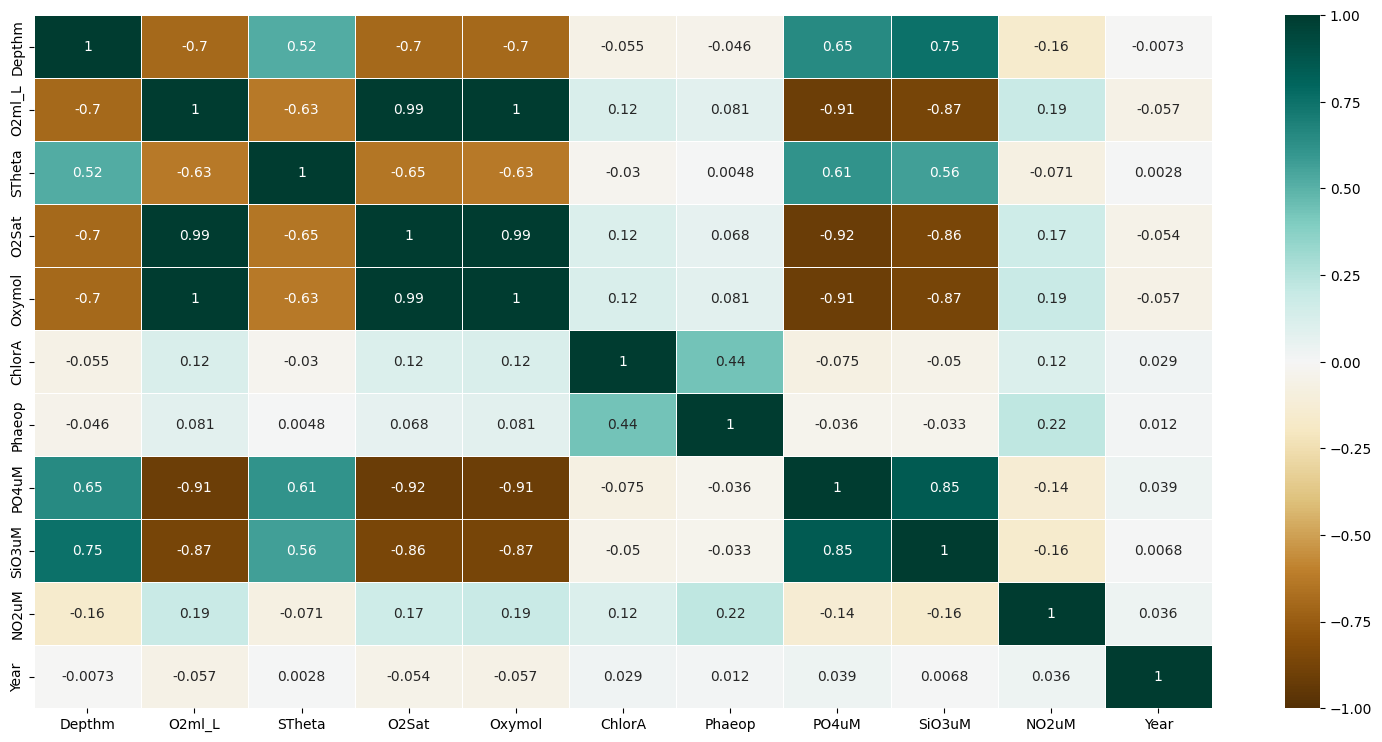

In [288]:
NormX_cleandf1.corr()
plt.figure(figsize=(19, 9))
heatmap=sns.heatmap(NormX_cleandf1.corr(),
            annot=True,    # This will annotate the cells with correlation values
            cmap='BrBG',  # Choose a colormap that represents the data well
            vmin=-1, vmax=1,  # Set the scale of the colormap from 0 to 1
            linewidths=.5,  # Set linewidth between the cells
            )


I've noticed that 'O2ml_L' still has a very strong correlation with other variables, including 'Oxymol', 'O2Sat', and 'PO4uM'. As a result, I will remove 'O2ml_L' from my model. Additionally, 'O2Sat' is strongly correlated with 'Oxymol'. Since 'Oxymol' has a stronger Pearson correlation coefficient with 'Salnty', I will also remove the 'O2Sat' variable

In [289]:
X_trainnorm_remove=X_trainnorm_df.drop(columns=['O2ml_L','O2Sat'])
X_devnnorm_remove=X_devnorm_df.drop(columns=['O2ml_L','O2Sat'])
X_testnorm_remove=X_testnorm_df.drop(columns=['O2ml_L','O2Sat'])

In [290]:
y_train_1=y_train.to_numpy()
y_dev_1=y_dev.to_numpy()
y_test_1=y_test.to_numpy()

X_trainnorm_remove_1=X_trainnorm_remove.to_numpy()
X_devnnorm_remove_1=X_devnnorm_remove.to_numpy()
X_testnorm_remove_1=X_testnorm_remove.to_numpy()


In [291]:
class CustomOLSReg():

    def __init__(self):

        self.coefficients = None  # our weights vector, w (in formulae above)
        self.intercept = None  # our intercept parameter, b (in formulae above)

    def fit(self, X, y):
        """
        Fit the linear regression model, train it using the provided data
        Calculate the number of non-zero coefficients in the model weights
        :param X: training features (num_samples, num_features)
        :param y: target training values (num_samples)
        :return: tuple (number of non-zeros coefficients of w)
        """
        num_nonzero_coefs=0

        # compute w and b and store them in self.coef_ and self.intercept
        #b (bias) is the interception of y when x=0

        self.coefficients = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)),np.transpose(X)),y)

        self.intercept = 0
        for i in range(len(X)):
            self.intercept += (y[i] - np.dot(self.coefficients, X[i]))/len(X)

        num_nonzero_coefs = np.count_nonzero(self.coefficients)

        #END
        return num_nonzero_coefs

    def evaluate(self, X, y, X_testordev, y_testordev):
        """
        Compute Root mean square error (RMSE) between the predicted values and the actual values of the test data or development data
        Compute R-squared between the predicted values and the actual values of the test data or development data
        Compute Pearson's Correlation r between the predicted values and the actual values of the test data or development data

        :param X: training features (num_samples, num_features)
        :param y: target training values (num_samples)
        :param X_testordev:instances array of shape (num_samples, num_features)
        :y_testordev: the true targets (development or test data), of shape (num_samples)
        :return: RMSE
        """

        #predict based on the test features and return the root mean squared error

        y_predict = np.matmul(X_testordev, self.coefficients) + self.intercept
        root_mean_squared_error = np.sqrt(((y_predict - y_testordev) ** 2).mean())
        r_squared = r2_score(y_testordev, y_predict)
        r = np.corrcoef(y_testordev, y_predict)[0, 1]

        print(f"RMSE: {root_mean_squared_error}")
        print(f"R-squared: {r_squared}")
        print(f"Pearson's r: {r}")

        #END
        return root_mean_squared_error, r_squared, r

Test Data:

In [292]:
#Checking Test Data
# Initialize the CustomOLS model with desired parameters. Use this
custom_ols_model = CustomOLSReg()

# Fit the model with the training data
custom_ols_model.fit(X_trainnorm_remove_1, y_train_1.ravel())  # Use ravel() to convert y_1 from 2D to 1D if needed

# Access the trained coefficients and intercept
trained_coefficients = custom_ols_model.coefficients
trained_intercept = custom_ols_model.intercept

print("Trained coefficients:", trained_coefficients)
print("Trained intercept:", trained_intercept)

custom_ols_model.evaluate(X_trainnorm_remove_1, y_train_1.ravel(),X_testnorm_remove_1, y_test_1.ravel())

Trained coefficients: [ 0.06016988  0.1809406  -0.21712132  0.01898959  0.00284069 -0.05075356
 -0.03267423 -0.01601094]
Trained intercept: 33.70426549195157
RMSE: 0.2787968845357404
R-squared: 0.5328771279217023
Pearson's r: 0.7407797731993727


(0.2787968845357404, 0.5328771279217023, 0.7407797731993727)

To verify the accuracy of my code and solution, I utilized a Python package designed for linear regression. The outcomes, including both the trained coefficients and the intercept, matched perfectly with my own results. Based on this comparison, I am confident that my code is correct.

In [295]:
from sklearn.linear_model import LinearRegression

In [294]:
#Model=LinearRegression()
#Model.fit(Xnormed_train_1, ynormed_train_1)
model=LinearRegression().fit(X_trainnorm_remove_1, y_train_1)
print(f"intercept:{model.intercept_}")
print(f"coefficients:{model.coef_}")

intercept:[33.70426549]
coefficients:[[ 0.06016988  0.1809406  -0.21712132  0.01898959  0.00284069 -0.05075356
  -0.03267423 -0.01601094]]


Development Data:

In [296]:
#Check Development Data
# Initialize the CustomOLS model with desired parameters. Use this
custom_ols_model = CustomOLSReg()

# Fit the model with the training data
custom_ols_model.fit(X_trainnorm_remove_1, y_train_1.ravel())  # Use ravel() to convert y_1 from 2D to 1D if needed

# Access the trained coefficients and intercept
trained_coefficients = custom_ols_model.coefficients
trained_intercept = custom_ols_model.intercept

print("Trained coefficients:", trained_coefficients)
print("Trained intercept:", trained_intercept)

custom_ols_model.evaluate(X_trainnorm_remove_1, y_train_1.ravel(),X_devnnorm_remove_1, y_dev_1.ravel())

Trained coefficients: [ 0.06016988  0.1809406  -0.21712132  0.01898959  0.00284069 -0.05075356
 -0.03267423 -0.01601094]
Trained intercept: 33.70426549195157
RMSE: 0.14961268761371943
R-squared: 0.8584892342952994
Pearson's r: 0.9293112991178938


(0.14961268761371943, 0.8584892342952994, 0.9293112991178938)

In [297]:
X_devnnorm_remove.head()

,Depthm,STheta,Oxymol,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM
0,-0.738776,-1.061067,2.050822,5.685325,3.489272,-1.239228,-1.005731,-0.276620
1,-0.730297,-1.061067,2.050822,5.685325,3.489272,-1.199547,-0.535186,0.208388
2,-0.717577,-1.029922,1.911161,6.287074,4.365688,-1.259068,0.006535,-0.222730
3,-0.696378,-0.937599,1.593280,3.564526,2.689067,0.506742,1.093929,-0.276620
4,-0.653979,-0.571645,0.942823,0.996086,1.965072,-1.259068,-0.989914,-0.276620


Overall, the RMSE, R-squared, and Pearson correlation results are better in the development data. However, the scores in the test data are not too bad either.

#***Question 5***



Based on all the coefficients, we find that the 'Oxymol' variable has the largest impact on the "Salnty" variable, indicating a strong negative relationship between Oxygen micromoles per kilogram seawater and Salinity levels. "PO4uM", "Phaeop", "SiO3uM", and "NO2uM" exhibit smaller coefficients (ranging from positive to negative), signaling their respective positive or negative associations with 'Salinity', albeit with less impact compared to other variables. An increase in the "STheta" variable, potential density (Sigma Theta), has the greatest positive effect on Salinity levels. This result is also consistent with our question 1 graph. "Depthm",cast depth in meters, and "ChlorA",igrograms Chlorophyll-a per liter seawater, measured fluorometrically, also has some positive effect on salinity level. I will not discuss too much about the numeric values because the data are normalized.

This finding is important for stakeholders if they want to control the salinity level. To increase salinity, the focus should be on increasing Potential Density (Sigma Theta) as well as the cast depth and micrograms of chlorophyll-a per liter of seawater. They also want to decrease the Oxygen micromoles per kilogram seawater and Micromoles Phosphate per liter of seawater. If they want to decrease the salinity level, they adjust oppositely. This is very important when they want to analyze a policy and see how the changes of several factors affect salinity levels and then affect marine ecosystem.

The model and its outcomes, demonstrating the impact of various environmental factors on salinity levels, can be a valuable educational tool for the public, raising awareness about environmental sustainability, marine health, and water resource management. For example, we can use the model outcomes to highlight how changes in environmental factors like cast depth, oxygen levels, and nutrient concentrations affect salinity and, consequently, marine ecosystems. This can help in advocating for reduced pollution and more sustainable land-use practices.


#***Question 6: Bonus***

In [ ]:
#Just take different vaariables and use packages to check different regression functions

#***Question 7: Logistic Regression (binary Outcomes)***

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [299]:
Y_cleandf1=cleandf1[["Salnty","Year"]]

In [300]:
mean_salinty=Y_cleandf1['Salnty'].mean()
Y_cleandf1.loc[:, 'Salinty_class'] = np.where(Y_cleandf1['Salnty'] > mean_salinty, 1, -1)

<ipython-input-300-84fe2461eec1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_cleandf1.loc[:, 'Salinty_class'] = np.where(Y_cleandf1['Salnty'] > mean_salinty, 1, -1)


In [301]:
Y_cleandf1_logistic_train=Y_cleandf1[(Y_cleandf1['Year']>=1980)&(Y_cleandf1['Year']<=2010)]
Y_cleandf1_logistic_development=Y_cleandf1[(Y_cleandf1['Year']>=2011)&(Y_cleandf1['Year']<=2013)]
Y_cleandf1_logistic_test=Y_cleandf1[(Y_cleandf1['Year']>=2014) & (Y_cleandf1['Year']<=2016)]

Y_cleandf1_logistic_train=Y_cleandf1_logistic_train.drop(columns=['Year','Salnty'])
Y_cleandf1_logistic_development=Y_cleandf1_logistic_development.drop(columns=['Year','Salnty'])
Y_cleandf1_logistic_test=Y_cleandf1_logistic_test.drop(columns=['Year','Salnty'])


In [302]:
Y_cleandf1_logistic_train_1=Y_cleandf1_logistic_train.to_numpy()
Y_cleandf1_logistic_development_1=Y_cleandf1_logistic_development.to_numpy()
Y_cleandf1_logistic_test=Y_cleandf1_logistic_test.to_numpy()

In [303]:
#Simply test the package: This works
logreg = LogisticRegression()
logreg.fit(X_trainnorm_remove_1, Y_cleandf1_logistic_train_1.ravel())
y_pred = logreg.predict(X_devnnorm_remove_1)

unique, counts = np.unique(y_pred, return_counts=True)

# Creating a dictionary from the unique values and counts for easy display
counts_dict = dict(zip(unique, counts))

print(counts_dict)


{-1: 12268, 1: 11954}


In [304]:

def logistics_regression(x_developdata, y_developdata):
    """
    Define a function for logistic regression algorithm and use the development data for hyper-parameter tuning:

    Parameters:
    x_developdata: features of the development dataset
    y_developdata: target variable of the development dataset
    """

    # Initialize the Logistic Regression model
    logreg = LogisticRegression()

    # Define the hyperparameter space for grid search
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 15, 20, 100],  # Regularization strength (\lambda)
        'penalty': ['l1', 'l2'],  # Regularization penalty term
        'solver': ['liblinear']  # Solver that supports L1 regularization
    }

    # Set up the grid search with cross-validation
    grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

    # Fit the model using the development data
    grid_search.fit(x_developdata, y_developdata)

    # Output the best parameters and best cross-validation score
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score (accuracy):", grid_search.best_score_)

    # Evaluate the model on the development data using the best estimator
    best_model = grid_search.best_estimator_
    y_dev_pred = best_model.predict(x_developdata)
    accuracy = accuracy_score(y_developdata, y_dev_pred)
    print("Development data accuracy:", accuracy)

    return best_model, accuracy


In [305]:
logistics_regression(X_devnnorm_remove_1, Y_cleandf1_logistic_development_1.ravel())

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score (accuracy): 0.9818346614581337
Development data accuracy: 0.983403517463463


(LogisticRegression(C=10, solver='liblinear'), 0.983403517463463)

Based on above parameters, we can get a very good cross-validation score on accuracy for development data and the prediction on development data is also very goods. Therefore, I will use parameters

*   Regularization strength (c):10
*   Regularization penalty:l2
*   Solver:liblinear
for test data.



In [306]:

# Best parameters using development data:
best_params = {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

# Initialize the logistic regression model with the best parameters
model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'])

# Train the model on the full training dataset
model.fit(X_trainnorm_remove_1, Y_cleandf1_logistic_train_1.ravel())

# Make predictions on the test dataset
y_pred = model.predict(X_testnorm_remove_1)

# Calculate the accuracy of the model on the test dataset
test_accuracy = accuracy_score(Y_cleandf1_logistic_test, y_pred)

print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9601330320214898


Using above parameters, my accuracy of the classifier on the test data is 0.96.